# **BUSI / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu  

![Social Media Buzz](https://assets.entrepreneur.com/content/3x2/2000/20180604150410-GettyImages-614509568.jpeg?auto=webp&quality=95&crop=16:9&width=675 "https://www.entrepreneur.com/article/313889")
## Class 10 - **Text Analysis II**: Social Media Buzz
*April 4, 2023*  
Version 1.2


# Today's Agenda


1. **Sentiment Analysis**
2. **Web Scraping**
3. **Text Analysis of Social Media**
3. **Sentiment Analysis for Tweets**
9. **Naïve Topic Discovery in Social Media**

## Prep-Check:
- **Read before class**:  Feldman, R., 2013. Techniques and applications for sentiment analysis. Communications of the ACM, 56(4), pp.82-89.

# 1 Sentiment Analysis

![Sentiment Analysis](https://blog.reputationx.com/hubfs/what-is-sentiment-analysis-cover.jpg?auto=webp&quality=95&crop=16:9&width=675 "https://blog.reputationx.com/whats-sentiment-analysis")

**Sentiment Analysis**, or **Opinion Mining**, is a sub-field of Natural Language Processing (NLP)
- Tries to identify and extract opinions within a given text. 

**Definition of Sentiment**
1. A view of or attitude toward a situation or event; an opinion.  
"I agree with your sentiments regarding the road bridge"  


2. Exaggerated and self-indulgent feelings of tenderness, sadness, or nostalgia.  
"many of the appeals rely on treacly sentiment"

*Source: Oxford Dictionary*

**In this course, we will measure the polarity of text.**

**Polarity** in sentiment analysis refers to identifying sentiment orientation:
- positive
- neutral
- negative   

in written or spoken language


**Objetive of Sentiment Analysis**
Gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

##1.1 Importance of Sentiment Analysis

- Enables companies to make sense out of unstructured data such as UGC (user generated content) 
- Automated way to extract insights about consumers perceptions and experiences

#### Brand Monitoring and Reputation Management

**Most common applications of sentiment anaysis:**

- Track the perception of the brand by the customers
- Point out the specific details about the attitude
- Find patterns and trends
- Keep a close eye on the presentation by the influencers.

**Examples:**
- Automate media monitoring process and the accompanying alert system
- Monitor mentions or reviews of the brand on different platforms (blogs, social media, review sites, forums, etc.)
- Categorize urgency of mentions according to the relevancy scoring (i.e., which platform, type of user is vital to the brand)

***Understanding how the consumers perceive your brand/product/service is equally useful for tech companies, marketing agencies, fashion brands, media organizations, and many others.***

## 1.2 Advantage of Sentiment Analysis
- Sifting through huge volumes of text is **difficult** and **time-consuming** 
- Requires **expertise** and **resources**

Sentiment Analysis:
- Enables firms to make sense out large amounts of textual: ***In an automated way***
- Allows firms to elicit vital insights from a vast unstructured dataset without having to manually process it

## 1.3 Limitations of Sentiment Analysis


1. Understanding emotions through text are not always easy: 
    - 100% accuracy from a computer is not rational
    - A text may contain ***multiple*** sentiments (polarities) all at once
        - *“The coffee was great, but the service could have been better”.*
    - ***Figurative Speech*** is difficult for machines to understand
        - *“That coffee tastes very interesting"*  
        

2. Micro-blogging content from social media platforms such as Twitter and Facebook poses serious challenges:  
    - large amount of data
    - language and expressions used to express sentiment
        - short forms
        - memes 
        - emoticons


## 1.4 Sentiment Scoring - Polarity

In [135]:
# 0. Run once to install the Vader Sentiment Classification Package
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
# 1. Import the module you need
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 2. Instantiate the sentiment analyzer
analyser = SentimentIntensityAnalyzer()

In [137]:
# 3. Define a function that returns the polarity score of a sentence
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<55} {}".format(sentence, str(score)), "\n")

In [138]:
# 4. Test how well Vader does
my_tweet = "KFBS is an horrible school 😊!!!!!!"
sentiment_analyzer_scores(my_tweet)

KFBS is an horrible school 😊!!!!!!--------------------- {'neg': 0.198, 'neu': 0.396, 'pos': 0.406, 'compound': 0.5673} 



In [139]:
# 5. Print the individual polarity scores
sentiment_dict = analyser.polarity_scores(my_tweet) 
print("Compound sentiment is", sentiment_dict['compound'], "\n") 
print("Sentence was rated as", sentiment_dict['neg']*100, "% Negative") 
print("Sentence was rated as", sentiment_dict['neu']*100, "% Neutral") 
print("Sentence was rated as", sentiment_dict['pos']*100, "% Positive") 

Compound sentiment is 0.5673 

Sentence was rated as 19.8 % Negative
Sentence was rated as 39.6 % Neutral
Sentence was rated as 40.6 % Positive


### 1.4.1 Interpreting Polarity

- The ***Positive***, ***Negative*** and ***Neutral scores*** represent the proportion of text that falls in these categories.   


- This means our sentence was rated as 61.7% Positive, 38.3% Neutral and 0% Negative. 
    - should add up to 1   
    

- The ***Compound score*** is a metric that calculates the sum of all the lexicon ratings 
    - which have been normalized between:
        - -1 (most extreme negative) and 
        - +1 (most extreme positive)
    - the ranges of the compound scrore are:
        - positive sentiment: compound score >= 0.05
        - neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
        - negative sentiment: compound score <= -0.05

***DIY*** Try editing my_text:
- writing "good" in all caps
- add exclamation marks
- add an emoji (e.g., 😊)
- add adjectives or adverbs (e.g., degree modifiers)
- use synonyms for words
- add a conjunction (e.g., "but") to signal a shift in sentiment
- negate the sentence with a tri-gram (e.g., "my coffee isn't really all that great")
- turn it into a negative statement about the Corona virus
- use some slang (e.g., "that virus really SUX!")  

***What do you observe?*** *Paste your example text and the compound score into the Zoom chat window*

### 1.4.2 Where do Vader's scores come from?

***The authors of Vader built a rule-based sentiment analysis engine that uses a dictionary to classify sentiment***

**To build their dictionary, they did the following:**

- Sentiment ratings from 10 independent human raters (all pre-screened, trained, and quality checked for optimal inter-rater reliability). 
- Over 9,000 token features were rated on a scale from "[–4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)". 
- We kept every lexical feature that had a non-zero mean rating, and whose standard deviation was less than 2.5 as determined by the aggregate of those ten independent raters. 
- This left us with just over 7,500 lexical features with validated valence scores that indicated both the sentiment polarity (positive/negative), and the sentiment intensity on a scale from –4 to +4. 
- For example:
    - the word "okay" has a positive valence of 0.9, "good" is 1.9, and "great" is 3.1
    - whereas "horrible" is –2.5, the frowning emoticon :( is –2.2, and "sucks" and it's slang derivative "sux" are both –1.5.

-----------------

***Excerpt from Vader's sentiment lexicon (dictionary) that can be found in the file "vader_lexicon.txt"***

| Word          | Polarity | Intensity | Ratings of 10 humans                     |
|---------------|----------|-----------|------------------------------------------|
| brightly      | 1.5      | 0.67082   | [2, 3, 1, 2, 1, 1, 2, 1, 1, 1]           |
| brightness    | 1.6      | 0.91652   | [2, 2, 1, 1, 1, 3, 3, 0, 2, 1]           |
| brightnesses  | 1.4      | 0.91652   | [2, 3, 1, 2, 1, 1, 0, 0, 2, 2]           |
| brights       | 0.4      | 0.66332   | [0, 0, 2, 0, 0, 1, 0, 0, 1, 0]           |
| brightwork    | 1.1      | 0.83066   | [1, 0, 1, 2, 1, 0, 3, 1, 1, 1]           |
| brilliance    | 2.9      | 0.83066   | [4, 3, 2, 4, 4, 3, 2, 3, 2, 2]           |
| brilliances   | 2.9      | 0.83066   | [3, 4, 3, 4, 4, 2, 3, 2, 2, 2]           |
| brilliancies  | 2.3      | 1.18743   | [1, 4, 1, 3, 3, 2, 1, 3, 4, 1]           |
| brilliancy    | 2.6      | 1.0198    | [4, 3, 2, 4, 2, 3, 1, 3, 1, 3]           |
| brilliant     | 2.8      | 0.6       | [2, 3, 3, 2, 3, 3, 4, 2, 3, 3]           |
| brilliantine  | 0.8      | 1.16619   | [-1, 3, 1, 0, 1, 0, 2, 0, 2, 0]          |
| brilliantines | 2        | 1.34164   | [0, 1, 4, 2, 3, 1, 3, 0, 3, 3]           |
| brilliantly   | 3        | 0.44721   | [3, 2, 3, 3, 3, 3, 3, 3, 4, 3]           |
| brilliants    | 1.9      | 0.83066   | [3, 1, 2, 1, 2, 1, 3, 2, 1, 3]           |
| brisk         | 0.6      | 0.8       | [0, 0, 0, 0, 1, 1, 0, 2, 0, 2]           |
| broke         | -1.8     | 0.4       | [-2, -2, -2, -2, -1, -2, -2, -1, -2, -2] |
| broken        | -2.1     | 0.53852   | [-2, -2, -2, -2, -3, -2, -1, -3, -2, -2] |
| brooding      | 0.1      | 1.3       | [3, 0, -1, -1, -1, 1, 1, -1, 1, -1]      |
| brutal        | -3.1     | 0.7       | [-3, -3, -4, -2, -3, -4, -3, -4, -3, -2] |
| brutalise     | -2.7     | 1.1       | [-4, -3, -3, -4, -3, -2, -2, -3, 0, -3]  |
| brutalised    | -2.9     | 0.83066   | [-3, -3, -2, -3, -3, -4, -4, -1, -3, -3] |
| brutalises    | -3.2     | 0.4       | [-3, -3, -3, -3, -3, -4, -4, -3, -3, -3] |
| brutalising   | -2.8     | 0.74833   | [-3, -3, -4, -3, -2, -3, -3, -3, -1, -3] |

-----------------

#2 Webscraping


![Tweet Scraping](https://mapxp.app/BUSI488/Increase-Twitter-Followers.jpg "Twitter")


- We will now look at some real-world data from Twitter that was collected from Twitter's website.
- These data (i.e., tweets) were written by real people (whom I have no influence over!)
- **Tweets can contain explicit and offensive content:**
    - Sexuality
    - Inappropriate language
    - Racism
    - Slurs

![Warning Explicit Content](https://mapxp.app/BUSI488/pngaaa.com-1860621.png "Warning")


**DISCLAIMER**

- The opinions and statements expressed by the tweets you might scrape and that we use
    - **Do not** represent the opinions and choice of words of your instructors, KFBS, UNC or the State of North Carolina
    - Are being analyzed solely for educational purposes, i.e., students' development of Data Science skills 
    
**YOUR CHOICE**
If you would not like to be exposed to possibly inappropriate, explicit and/or offensive content  
***YOU MAY LEAVE THIS SESSION NOW***

- Please contact me after today's session so that we can develop an alternative way of conveying the content of today's class to you.

## **2.1 How to Collect UGC from Social Media**

### **For commercial purposes**

Twitter (and many other social media platforms such as Facebook) offers a professional API that allows you to download data (and even publish content) at a cost. Prices vary depending on the specific services and the volume of data you need.

https://developer.twitter.com/en   

### **Web scraping** 

- web scraping
- web harvesting
- web data extraction 

is an alternative to Twitter's API (but is not a legally viable option for commercial purposes!)

Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol (HTTP), or through a web browser. 

- Can be done manually, for example: https://twitter.com/explore
- Typically automated processes implemented using a bot or web crawler

Web scraping is a form of copying, in which ***specific data*** are gathered and copied from the web.
These data are typically stored in a database, a file, or spreadsheet (or a python dataframe), for later retrieval and analysis. 

*Source: Wikipedia.org*

## **2.2 Open Source Webscraping: SNScrape**

We will use a web scraper from Github to:
1. Learn how web scraping works
2. Apply text analysis techniques to user generated content (UGC) that individuals posted publicly on the web (i.e., on Twitter).

***SNScrape is a versatile scraper that works on various social media platforms:***

A scraper for social networking services (SNS). It scrapes things like user profiles, hashtags, or searches and returns the discovered items, e.g. the relevant posts.

The following services are currently supported:

- Facebook: user profiles, groups, and communities (aka visitor posts)
- Instagram: user profiles, hashtags, and locations
- Mastodon: user profiles and toots (single or thread)
- Reddit: users, subreddits, and searches (via Pushshift)
- Telegram: channels
- Twitter: users, user profiles, hashtags, searches, tweets (single or surrounding thread), list posts, and trends
- VKontakte: user profiles
- Weibo (Sina Weibo): user profiles

*source*: https://github.com/JustAnotherArchivist/snscrape  

**NOTICE:**   
SNscrape *requires Python 3.8*, which has recently been introduced on Google CoLab!




### 2.2.1 Installing SNScrape on CoLab
Before we can start, we need to install SNScrape on Google CoLab.
- You will need to do so each time you run this notebook (i.e., each time you start a new runtime)
- Execute `pip3 install snscrape `on the command line using a `!`

In [140]:
# # 1. Install SNScrape on Google CoLab
# !pip3 install snscrape

### 2.2.3 Scraping some Tweets

Now you can scrape tweets with the following command:

  `snscrape --jsonl --progress --max-results 1000 --since 2023-02-1 twitter-search "Valentine lang:en until:2023-02-14" > valentine2023.json`

  **Notice** that the search term (valentine) we are looking for is right after the quotation marks `"Valentine` and that the we have closing quotation marks after the *until* date.
  
  **Some important controls are:**
  - --max-results 1000  (here scrape up to 1000 tweets)
  - --since 2022-02-1 (starting date)
  - lang:en (language of user: could also be de for German)
  - until:2023-02-14 (end date)
  - " > filename (here, valentine.json)

**NOTE:**
1. Make sure you are in the path where you want the scraped tweets to be saved
2. Remember: To excute a shell command form CoLab, you need to preceed it with an exclamation mark 

***Advanced Queries***  
You can also make your queries more complex (the syntax is available from Twitter). More complex queries using AND, OR, and NOT can be necessary. Consider the brand "American Airlines" for example. The following queries will return very different results:

1. snscrape --jsonl --progress --max-results 1000 --since 2022-02-01 twitter-search "'American Airlines' lang:en until:2022-02-02" > air1.json

2. snscrape --jsonl --progress --max-results 1000 --since 2022-02-01 twitter-search "American -Airlines lang:en until:2022-02-02" > air12.json

3. snscrape --jsonl --progress --max-results 1000 --since 2022-02-01 twitter-search "American OR Airlines lang:en until:2022-02-02" > air3.json

4. snscrape --jsonl --progress --max-results 1000 --since 2022-02-01 twitter-search "American AND Airlines lang:en until:2022-02-02" > air4.json


In [141]:
!snscrape --jsonl --progress --max-results 1000 --since 2023-02-1 twitter-search "valentine lang:en until:2023-02-15" > valentine2023.json
#!snscrape --jsonl --progress --max-results 100 --since 2023-02-1 twitter-search "valentine lang:en" > valentine2023.json

Scraping, 100 results so far
Scraping, 200 results so far
Scraping, 300 results so far
Scraping, 400 results so far
Scraping, 500 results so far
Scraping, 600 results so far
Scraping, 700 results so far
Scraping, 800 results so far
Scraping, 900 results so far
Scraping, 1000 results so far
Stopped scraping after 1000 results due to --max-results


**So where did the scraped tweets go?** That is, where is the file `valentine2023.json`?

Hint: The file is in your current path! Take a look using `%ls`

In [142]:
# Check which files are in out current path
%ls

colgate.json  gdrive/  sample_data/  valentine2023.json


***WARNING*** Unless you connected your Google Drive, changed the path into a folder on Google Drive, and scraped tweets into a file in that folder, ***the scraped results file will be deleted automatically when you close this session.***

# **2.3 A first glimpse of what we scraped from Twitter**

- We scraped tweets and saved them into a JSON file 
- Let's load the file into a pandas dataframe and take a look


In [143]:
# 1. Import libraries
import pandas as pd

# 2. Read JSON into a dataframe (make sure to set lines to TRUE)
tweets = pd.read_json("valentine2023.json", lines=True)

# 3. Take a look at the first tweet
tweets.iloc[3]

_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### 2.3.1 Keep Relevant Information 
- Depending on our analysis, we need only specific infomation
- Drop anything you don't need to save RAM and disc space


In [144]:
# 1. Keep only certain columns
tweets = tweets.filter(['id','renderedContent','date','user', 'conversationId'], axis=1)

# 2. We want to see as much of the columns as possible:
pd.set_option('max_colwidth', 400)

# 3. Let's take a look
display(tweets.head(10))
print()
display(tweets.info())

,id,renderedContent,date,user,conversationId
0,1625646066665402369,"@A_username_2 Wuh\nNo, you’re MY valentine",2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'tents_on_fire_', 'id': 1519333471889461248, 'displayname': 'Tents-On-Fire 🔞', 'rawDescription': '🔞 A Meowth/Espeon, travelling the world and drawing the lewd 25 | he/him | bi | ♒ | 🇰🇷🇦🇷🇪🇸-🇺🇸 | Aipom is wife Icon & Banner by @SoftestPuffss', 'renderedDescription': '🔞 A Meowth/Espeon, travelling the world and drawing the lewd 25 | he/him | ...",1625557977230102528
1,1625646066661031936,Please enjoy my favorite Pride and Prejudice valentines. https://t.co/yyVJ1F2wT9,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'karadetwiller', 'id': 125447913, 'displayname': 'Kara Detwiller', 'rawDescription': 'freelance writer ✏️ | Iowa ➡️ Saskatchewan 🇨🇦 | anti hustle culture ⚙️', 'renderedDescription': 'freelance writer ✏️ | Iowa ➡️ Saskatchewan 🇨🇦 | anti hustle culture ⚙️', 'descriptionLinks': None, 'verified': False, 'created': '2010-03-22T21:16:49+00:00', ...",1625646066661031936
2,1625646066078195712,Happy Valentine's. dears! Business accuracy business promotes our positive&amp;creative! To everyone's win-win...,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'AccuracyDollars', 'id': 2804546653, 'displayname': 'MINIMICROECONOMICS', 'rawDescription': 'MinimicroAccuracy Ph.D offers business accuracy business &living better & LONGER! Promise-breakers pay the consequences!Promise- keepers stay tall&ever honored!', 'renderedDescription': 'MinimicroAccuracy Ph.D offers business accuracy business &liv...",1625646066078195712
3,1625646065851502594,@SmileZ4DaCannoN Aww if I didn’t already have a Valentine I’d be yours 😆,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'SolecialGirl', 'id': 1197186022800576514, 'displayname': 'Tamara', 'rawDescription': 'Sneaker 👟 SHOP & SCHOOL owner | @myeverydaykicks | @gotemused | @ebay Partner|MBA| PHD CANDIDATE |Building my community 🤎,👟’s, edu📚 & sustainability♻️🏳️‍🌈', 'renderedDescription': 'Sneaker 👟 SHOP & SCHOOL owner | @myeverydaykicks | @gotemused | @ebay Par...",1625546203445313569
4,1625646065574871043,@magnusscn happy valentines day liz 🫶🏼🫶🏼,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'leclercsamour', 'id': 1547080518566457346, 'displayname': 'kayla', 'rawDescription': 'guys where seb ?', 'renderedDescription': 'guys where seb ?', 'descriptionLinks': None, 'verified': False, 'created': '2022-07-13T04:48:41+00:00', 'followersCount': 1118, 'friendsCount': 1428, 'statusesCount': 12686, 'favouritesCount': 21481, 'listedCoun...",1625518227093594114
5,1625646065251753985,Happy Jill Valentine's Day! !gil !commands twitch.tv/retroghost97,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'RetroGhostUSA', 'id': 1611270017215078400, 'displayname': 'RetroGhost97', 'rawDescription': 'Army Vet, Twitch Affiliate, Retro Gamer🐸 Stop by twitch and say hello!', 'renderedDescription': 'Army Vet, Twitch Affiliate, Retro Gamer🐸 Stop by twitch and say hello!', 'descriptionLinks': None, 'verified': False, 'created': '2023-01-06T07:54:58+...",1625646065251753985
6,1625646064807059463,You told her you “don’t believe in Valentines Day” so she got somebody else to do it huh 🤔 😂,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'username': 'reign_of_kay', 'id': 377040982, 'displayname': '✨Nyambi ✨', 'rawDescription': 'In my delusional era.', 'renderedDescription': 'In my delusional era.', 'descriptionLinks': None, 'verified': False, 'created': '2011-09-20T22:38:33+00:00', 'followersCount': 363, 'friendsCount': 450, 'statusesCount': 3000, 'favouritesCount': 4180, 'listedCount...",1625646064807059463
7,1625646064547102720,@bloom_gal Thank you!!! Happy Valentines Day to you!!! 😀❤️😘🤗,2023-02-14 23:59:59+00:00,"{'_type': 'snscrape.modules.twitter.User',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               1000 non-null   int64              
 1   renderedContent  1000 non-null   object             
 2   date             1000 non-null   datetime64[ns, UTC]
 3   user             1000 non-null   object             
 4   conversationId   1000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 39.2+ KB


None

### 2.3.2 Inspect Tweets

In [145]:
# 1. Let's print only the tweet content for a certain range of tweets
for i in range(0,25):
    print(tweets.renderedContent[i]) 
    print('\n')

@A_username_2 Wuh
No, you’re MY valentine


Please enjoy my favorite Pride and Prejudice valentines. https://t.co/yyVJ1F2wT9


Happy Valentine's. dears! Business accuracy business promotes our positive&amp;creative! To everyone's win-win...


@SmileZ4DaCannoN Aww if I didn’t already have a Valentine I’d be yours 😆


@magnusscn happy valentines day liz 🫶🏼🫶🏼


Happy Jill Valentine's Day! !gil !commands twitch.tv/retroghost97


You told her you “don’t believe in Valentines Day” so she got somebody else to do it huh 🤔 😂


@bloom_gal Thank you!!! Happy Valentines Day to you!!! 😀❤️😘🤗


Happy Valentine's day, joins us this Weekend with your loved ones and enjoy with Señor Bolero💕
Only two more weeks and tickets are selling fast, get yours at thaliatheatre.org

 - mailchi.mp/c0e1b4d7c32e/c… https://t.co/buc11tJ7ws


Happy Valentines Day Denise, my Princess!  
Good shooting! https://t.co/Bl2xND1aFR


20 years ago for our first Valentine's Day, I failed to make reservations, so we ended up at Re

### 2.3.3 Working with Emojis

We can use a nice package called emoji to identify emojis within text  
https://github.com/alexandrevicenzi/emojis


In [146]:
# # 1. First download and install the package
# !pip3 install -U emoji

In [147]:
# 2. Import package emoji
import emoji

# 3. Get a list of emojis from a tweet
focaltweet = tweets.renderedContent[7]
elist = emoji.distinct_emoji_list(focaltweet)
print(' '.join(e for e in elist))

❤️ 😀 🤗 😘


In [148]:
# 4. Let's do that for all of our tweets and store the emojis in a new column called "emojis"
tweets['emojis'] = tweets['renderedContent'].apply(lambda txt: emoji.distinct_emoji_list(txt)) # this will get you the unique emojis

# 5. Check if it worked
display(tweets.iloc[0:20,[1,5]]) # logical indexing: from tweets get rows 0 to 20 

,renderedContent,emojis
0,"@A_username_2 Wuh\nNo, you’re MY valentine",[]
1,Please enjoy my favorite Pride and Prejudice valentines. https://t.co/yyVJ1F2wT9,[]
2,Happy Valentine's. dears! Business accuracy business promotes our positive&amp;creative! To everyone's win-win...,[]
3,@SmileZ4DaCannoN Aww if I didn’t already have a Valentine I’d be yours 😆,[😆]
4,@magnusscn happy valentines day liz 🫶🏼🫶🏼,[🫶🏼]
5,Happy Jill Valentine's Day! !gil !commands twitch.tv/retroghost97,[]
6,You told her you “don’t believe in Valentines Day” so she got somebody else to do it huh 🤔 😂,"[🤔, 😂]"
7,@bloom_gal Thank you!!! Happy Valentines Day to you!!! 😀❤️😘🤗,"[❤️, 😀, 🤗, 😘]"
8,"Happy Valentine's day, joins us this Weekend with your loved ones and enjoy with Señor Bolero💕\nOnly two more weeks and tickets are selling fast, get yours at thaliatheatre.org\n\n - mailchi.mp/c0e1b4d7c32e/c… https://t.co/buc11tJ7ws",[💕]
9,"Happy Valentines Day Denise, my Princess! \nGood shooting! https://t.co/Bl2xND1aFR",[]


In [149]:
# 6. Turn emojis into text
print(emoji.demojize('BUSI488 is 👍'))

BUSI488 is :thumbs_up:


In [150]:
# 7. Turn text into emojis
print(emoji.emojize('BUSI488 is :thumbs_up:'))

BUSI488 is 👍


In [151]:
# 8. Replace Emojis in Tweets with text and save to a new column
tweets['text'] = tweets['renderedContent'].apply(lambda txt: emoji.demojize(txt, delimiters=("", " ")))

# 9. Check if it worked
display(tweets.iloc[0:5,[1,6]]) # logical indexing: from tweets get rows 0 to 5 and columns 1 and 5 

,renderedContent,text
0,"@A_username_2 Wuh\nNo, you’re MY valentine","@A_username_2 Wuh\nNo, you’re MY valentine"
1,Please enjoy my favorite Pride and Prejudice valentines. https://t.co/yyVJ1F2wT9,Please enjoy my favorite Pride and Prejudice valentines. https://t.co/yyVJ1F2wT9
2,Happy Valentine's. dears! Business accuracy business promotes our positive&amp;creative! To everyone's win-win...,Happy Valentine's. dears! Business accuracy business promotes our positive&amp;creative! To everyone's win-win...
3,@SmileZ4DaCannoN Aww if I didn’t already have a Valentine I’d be yours 😆,@SmileZ4DaCannoN Aww if I didn’t already have a Valentine I’d be yours grinning_squinting_face
4,@magnusscn happy valentines day liz 🫶🏼🫶🏼,@magnusscn happy valentines day liz heart_hands_medium-light_skin_tone heart_hands_medium-light_skin_tone


In [152]:
# 10. Easier to read:
i = 0
print(tweets.renderedContent[i],"\n")
print(tweets.text[i])

@A_username_2 Wuh
No, you’re MY valentine 

@A_username_2 Wuh
No, you’re MY valentine


### 2.3.4 User Information
We also scraped user information with each tweet. Let's check it out!

In [153]:
# 1. Look at a User (you get a dict)
tweets.user[0]

{'_type': 'snscrape.modules.twitter.User',
 'username': 'tents_on_fire_',
 'id': 1519333471889461248,
 'displayname': 'Tents-On-Fire 🔞',
 'rawDescription': '🔞\nA Meowth/Espeon, travelling the world and drawing the lewd\n25 | he/him | bi | ♒ | 🇰🇷🇦🇷🇪🇸-🇺🇸 | Aipom is wife\nIcon & Banner by @SoftestPuffss',
 'renderedDescription': '🔞\nA Meowth/Espeon, travelling the world and drawing the lewd\n25 | he/him | bi | ♒ | 🇰🇷🇦🇷🇪🇸-🇺🇸 | Aipom is wife\nIcon & Banner by @SoftestPuffss',
 'descriptionLinks': None,
 'verified': False,
 'created': '2022-04-27T15:11:46+00:00',
 'followersCount': 791,
 'friendsCount': 846,
 'statusesCount': 5523,
 'favouritesCount': 20181,
 'listedCount': 1,
 'mediaCount': 443,
 'location': 'California, USA',
 'protected': False,
 'link': {'_type': 'snscrape.modules.twitter.TextLink',
  'text': 'furaffinity.net/user/tents-on-…',
  'url': 'https://www.furaffinity.net/user/tents-on-fire/',
  'tcourl': 'https://t.co/mwD54CofiV',
  'indices': [0, 23]},
 'profileImageUrl': 'htt

In [154]:
# 2. Extract a value from a User dict
tweets.user[0].get('followersCount')

791

### 2.3.5 Conversations on Twitter
We can easily reconstruct conversations on Twitter when we scrape all tweets
- Must have all Tweets of conversation
- Might be difficult because not every comment hast to include our searchterm
- Tweets without search term were not scraped

In [155]:
# 1. Top 3 Longest Conversations
tweets.conversationId.value_counts()[0:3]

1625623636399849472    8
1611552411113357314    3
1625449670485987328    3
Name: conversationId, dtype: int64

In [156]:
# 2. Get tweets of 2nd longest conversation
tmp = tweets.renderedContent[tweets.conversationId==tweets.conversationId.value_counts().index[2]]

In [157]:
# 3. Print tweets of 2n longest conversation
for count, value in enumerate(tmp):
     print(f"-- {count} ------------------------------------------------- \n",value, "\n" )

-- 0 ------------------------------------------------- 
 @mhdksafa Yes. Happy Valentines Day! 

-- 1 ------------------------------------------------- 
 @mhdksafa You both look lovely! Happy Valentine's Day! 

-- 2 ------------------------------------------------- 
 @mhdksafa you are always welcome in my heart. Happy valentines day! you both look lovely mashallah 



## **2.4 Scraping Reddit**

- SNScrape allows allows you to scrape data from Reddit
- The syntax is slightly different 
- You get less detailed data from Reddit

The general syntax for scraping reddits that include a certain term is as follows:

```
!snscrape --json --progress reddit-search --before timestamp --after timestamp Searchterm > Filename.json
```

The timestamps are not standard dates. Instead, they are UNIX time:
- Unix time is a date-time format used to express the number of milliseconds that have elapsed since January 1, 1970 00:00:00 (UTC)



In [158]:
# 1. Import some libraries
import time
import calendar
import datetime

In [159]:
# 2. Define Functions to get dates in UNIX time
def get_enddate(year, month):
    frst, lst = calendar.monthrange(year, month)
    d = datetime.datetime(year, month, lst, 23,59,59)
    d = int(time.mktime(d.timetuple()))
    return d

def get_startdate(year, month):
    d = datetime.datetime(year, month, 1, 0,0,0)
    d = int(time.mktime(d.timetuple()))
    return d

In [160]:
# 3. Define Search Paramters
year_start = 2023
year_end = 2023
month_start = 2
month_end = 2
searchterm = "colgate"
outfile ="colgate.json"

In [161]:
# 4. Get Unix Dates
var_before = get_enddate(year_end, month_end)
var_after = get_startdate(year_start, month_start)

In [162]:
# 5. Use SNScrape to scrape Reddits
!snscrape --json --progress reddit-search --before $var_before --after $var_after $searchterm > $outfile

Scraping, 100 results so far
Scraping, 200 results so far
Scraping, 300 results so far
Scraping, 400 results so far
Scraping, 500 results so far
Scraping, 600 results so far
Scraping, 700 results so far
Scraping, 800 results so far
Scraping, 900 results so far
Scraping, 1000 results so far
Scraping, 1100 results so far
Scraping, 1200 results so far
Scraping, 1300 results so far
Scraping, 1400 results so far
Scraping, 1500 results so far
Scraping, 1600 results so far
Scraping, 1700 results so far
Finished, 1704 results


In [163]:
# 6. Load scraped Reddits and take a look!
import pandas as pd
reddits = pd.read_json(outfile, lines=True)
reddits.columns.to_list()

['_type',
 'author',
 'date',
 'id',
 'link',
 'selftext',
 'subreddit',
 'title',
 'url',
 'created',
 'body',
 'parentId']

In [164]:
# 7. Keep what we need
df= reddits[['body','title',"subreddit",'date',"author","url"]].copy()
df.tail()

,body,title,subreddit,date,author,url
1699,"I fall on 2. Nostalgia pandering and I don't really like the art style (colgate hair and same face syndrome). And just for those reasons, I don't even want to bother playing. Then again, I'm pretty stubborn. I hear it's fun, but I can't get over how much I dislike the art style.",NaN,fireemblem,2023-02-01 01:03:09+00:00,ascheart,https://old.reddit.com/r/fireemblem/comments/10qdraq/opinions_on_engage_based_on_other_games_you_have/j6pt2ll/
1700,?\n\nThat's just the url code. Scroll down:\n\n&amp;#x200B;\n\n&gt;We certify that all Colgate® toothpastes are gluten-free.,NaN,Celiac,2023-02-01 00:56:35+00:00,irreliable_narrator,https://old.reddit.com/r/Celiac/comments/10p23b0/colgate_toothpaste_not_gf_anymore/j6ps63h/
1701,"I don't know about ORU and Colgate, while they don't have any bad losses, they also don't have any wins against teams they might face in the tournament.",NaN,CollegeBasketball,2023-02-01 00:52:48+00:00,Puzzleheaded-Bird222,https://old.reddit.com/r/CollegeBasketball/comments/10q1ly3/oral_roberts_wins_by_50_remains_perfect_in/j6prn2a/
1702,Please tell me it’s Colgate! So hot!,NaN,InstagramLivesNSFWx,2023-02-01 00:30:53+00:00,justpostlivesssss,https://old.reddit.com/r/InstagramLivesNSFWx/comments/10qeq37/join_shes_perfect/j6pojao/
1703,Wonderful response! That's basically what I'm thinking. And most Americans live on credit and don't have the equivalent of Q80k available in their bank account either. I imagine with that kind of money you can easily open a business in Guatemala (but I do realize that most do not have the cash and they have to repay coyotes after they arrive here). Or with Q80k you can buy a plane ticket and m...,NaN,guatemala,2023-02-01 00:20:44+00:00,metaman213,https://old.reddit.com/r/guatemala/comments/10pw7tb/a_question_from_little_guatemala_los_angeles/j6pn39q/


In [165]:
# 8. Simplify Dates
df['date'] =  pd.to_datetime(df['date']).dt.tz_localize(None)
df.tail()

,body,title,subreddit,date,author,url
1699,"I fall on 2. Nostalgia pandering and I don't really like the art style (colgate hair and same face syndrome). And just for those reasons, I don't even want to bother playing. Then again, I'm pretty stubborn. I hear it's fun, but I can't get over how much I dislike the art style.",NaN,fireemblem,2023-02-01 01:03:09,ascheart,https://old.reddit.com/r/fireemblem/comments/10qdraq/opinions_on_engage_based_on_other_games_you_have/j6pt2ll/
1700,?\n\nThat's just the url code. Scroll down:\n\n&amp;#x200B;\n\n&gt;We certify that all Colgate® toothpastes are gluten-free.,NaN,Celiac,2023-02-01 00:56:35,irreliable_narrator,https://old.reddit.com/r/Celiac/comments/10p23b0/colgate_toothpaste_not_gf_anymore/j6ps63h/
1701,"I don't know about ORU and Colgate, while they don't have any bad losses, they also don't have any wins against teams they might face in the tournament.",NaN,CollegeBasketball,2023-02-01 00:52:48,Puzzleheaded-Bird222,https://old.reddit.com/r/CollegeBasketball/comments/10q1ly3/oral_roberts_wins_by_50_remains_perfect_in/j6prn2a/
1702,Please tell me it’s Colgate! So hot!,NaN,InstagramLivesNSFWx,2023-02-01 00:30:53,justpostlivesssss,https://old.reddit.com/r/InstagramLivesNSFWx/comments/10qeq37/join_shes_perfect/j6pojao/
1703,Wonderful response! That's basically what I'm thinking. And most Americans live on credit and don't have the equivalent of Q80k available in their bank account either. I imagine with that kind of money you can easily open a business in Guatemala (but I do realize that most do not have the cash and they have to repay coyotes after they arrive here). Or with Q80k you can buy a plane ticket and m...,NaN,guatemala,2023-02-01 00:20:44,metaman213,https://old.reddit.com/r/guatemala/comments/10pw7tb/a_question_from_little_guatemala_los_angeles/j6pn39q/


**NOTE on Reddit Scraping:** 

- You would want to preprocess reddit posts. Your preprocessing may look different. Reddits are qualitatively different than Tweets.

- SNScrape can also scrape users ('reddit-user') and subreddits ('reddit-subreddit') from reddit. Take a look at the GitHub repository: [SNScrape on Github](https://github.com/JustAnotherArchivist/snscrape)

## **2.5 Easier Webscraping with Apify.com**

[Apify.com](https://apify.com)

![Apify-main](https://mapxp.app/MBA742/apify.png "apify.com")


#### **Webscraping can be challenging**
- Sophisticated blocking by websites
- Different scraper for every task
- Need to continuously update scraper
- Requires computational resources and bandwidth

#### **Webscraping Providers make your Life Easier!**
- Out-of-the-Box Webscrapers for many websites
- Maintained by professional developers
- Low cost and effort
- Proxy Servers help you stay undetected
- Computational resources on platform (SaaS), not on your local computer

***See what Apify has to offer***
![Apify-scrapers](https://mapxp.app/MBA742/apify-scrapers.png "apify.com")

- Easy to get started with Free Account
- Sign-up and start scraping
- Fill put survey and get more free credit
- Add funds to scrape more
- Upgrade to more powerful plans
- Deploy your own scrapers
- Make your own scrapers available to others and earn money!

### **Three Simple Steps:**

### Step 1: Scrape Data on Apify and save it to a file
### Step 2: Upload scraped data to Google Drive
### Step 3: Load scraped data and analyze


In [166]:
# 0. Connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class22
!ls # special shell command to view the files in the home directory of the notebook environment

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Class22
488_2023_Class22.ipynb	amazondata.json  coronaUSA2022.json


In [167]:
# 1. Import pandas if you haven't already done so
import pandas as pd

# 2. Read data into dataframe
df=pd.read_json("amazondata.json")

# 3. Take a look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   productAsin        2075 non-null   object        
 1   ratingScore        2075 non-null   int64         
 2   reviewTitle        2075 non-null   object        
 3   reviewUrl          2074 non-null   object        
 4   reviewReaction     2075 non-null   object        
 5   reviewedIn         2075 non-null   object        
 6   date               2075 non-null   datetime64[ns]
 7   country            2075 non-null   object        
 8   countryCode        1005 non-null   object        
 9   reviewDescription  2075 non-null   object        
 10  isVerified         2075 non-null   bool          
 11  variant            2075 non-null   object        
 12  reviewImages       2075 non-null   object        
 13  position           2075 non-null   int64         
dtypes: bool(

In [168]:
# 4. Look at the frist few rows
df.head(5)

,productAsin,ratingScore,reviewTitle,reviewUrl,reviewReaction,reviewedIn,date,country,countryCode,reviewDescription,isVerified,variant,reviewImages,position
0,B07JWVR1PK,5,It has helped with my teeth sensitivity,https://www.amazon.com/gp/customer-reviews/R1AQFJAFGXDS2L/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B07JWVR1PK,,"Reviewed in the United States on December 9, 2022",2022-12-09,United States,None,I like the product and will buy again,True,Style: CharcoalSize: 2 Pack,[],1
1,B07JWVR1PK,5,"Leaves my breath smelling fresh and my teeth, whiten,",https://www.amazon.com/gp/customer-reviews/R3NGNUSMFH75D6/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B07JWVR1PK,,"Reviewed in the United States on December 9, 2022",2022-12-09,United States,None,Helps keep teeth clean and cavity free,True,Style: Whitening PasteSize: 4.8 Ounce (Pack of 2),[],2
2,B07JWVR1PK,5,Better than I expected,https://www.amazon.com/gp/customer-reviews/R2FKX7PLNSTVKA/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B07JWVR1PK,,"Reviewed in the United States on November 28, 2022",2022-11-28,United States,None,I saw a marked difference just after a few uses. Leaves your mouth feeling fresh for a good part of the day.,True,Style: CharcoalSize: 2 Pack,[],3
3,B07JWVR1PK,5,Does not Whiten,https://www.amazon.com/gp/customer-reviews/RG5FRFJUIQOL1/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B07JWVR1PK,,"Reviewed in the United States on November 19, 2022",2022-11-19,United States,None,I enjoy the taste but it is not whitening my teeth and I have been using it for over a month. I would not buy this again because it is just like a regular toothpaste.,True,Style: Whitening PasteSize: 4.8 Ounce (Pack of 2),[],4
4,B07JWVR1PK,5,Great toothpaste!,https://www.amazon.com/gp/customer-reviews/RMSUQNLQSF974/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&ASIN=B07JWVR1PK,,"Reviewed in the United States on November 8, 2022",2022-11-08,United States,None,I love this toothpaste! Even though whitening toothpaste normally makes my skin slough off inside my mouth this brand doesn't do that! The best thing about this product is I got such a savings compared to buying it from my grocery store! I basically got 2 tubes for free buying from this site. How can you say no!,True,Style: Clean MintSize: 4.8 Ounce (Pack of 4),[],5


In [169]:
# 5. Read the first couple of reviews
for i in range(0,5):
    print(df.reviewDescription[i]) 
    print('\n')

I like the product and will buy again


Helps keep teeth clean and cavity free


I saw a marked difference just after a few uses. Leaves your mouth feeling fresh for a good part of the day.


I enjoy the taste but it is not whitening my teeth and I have been using it for over a month. I would not buy this again because it is just like a regular toothpaste.


I love this toothpaste! Even though whitening toothpaste normally makes my skin slough off inside my mouth this brand doesn't do that! The best thing about this product is I got such a savings compared to buying it from my grocery store! I basically got 2 tubes for free buying from this site. How can you say no!




# 3 Sentiment Analysis for Tweets

- Today, we will analyze tweets that I mined with SNScrape during the CoVid Pandemic in 2022  
- I used the following search query: 

```
snscrape --jsonl --progress --max-results 10000 --since 2022-01-1 twitter-search "Corona lang:en geocode:39.8,-95.583068847656,2500km until:2022-02-12" > coronaUSA2022.json
```

Before we can start analyzing the sentiment of the scraped tweets, we need to do some data cleaning and preprocessing
- remove URLs from tweets
- remove # and @ from tweets
- remove reserved words (e.g., RT and FAV) from tweets
- remove links to images

In [170]:
# 0. Connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class22
!ls # special shell command to view the files in the home directory of the notebook environment

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Class22
488_2023_Class22.ipynb	amazondata.json  coronaUSA2022.json


In [171]:
# 1. Load Tweets and inspect
import pandas as pd
pd.set_option('max_colwidth', 20)
tweets = pd.read_json('coronaUSA2022.json', lines=True)
tweets.tail()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
5872,snscrape.modules...,https://twitter....,2022-01-01 02:42:...,@bluegirlsrule1 ...,@bluegirlsrule1 ...,1477108029778706437,{'_type': 'snscr...,0,0,1,...,None,NaN,None,1.477009e+18,{'_type': 'snscr...,[{'_type': 'snsc...,{'_type': 'snscr...,{'_type': 'snscr...,None,None
5873,snscrape.modules...,https://twitter....,2022-01-01 02:36:...,@ArizonaWilson99...,@ArizonaWilson99...,1477106550275596288,{'_type': 'snscr...,0,0,1,...,None,NaN,None,1.477101e+18,{'_type': 'snscr...,[{'_type': 'snsc...,{'_type': 'snscr...,{'_type': 'snscr...,None,None
5874,snscrape.modules...,https://twitter....,2022-01-01 02:29:...,2nd blaster def ...,2nd blaster def ...,1477104768661090305,{'_type': 'snscr...,6,1,17,...,[{'_type': 'snsc...,NaN,None,NaN,None,None,{'_type': 'snscr...,{'_type': 'snscr...,None,None
5875,snscrape.modules...,https://twitter....,2022-01-01 01:52:...,Just posted a ph...,Just posted a ph...,1477095444849254404,{'_type': 'snscr...,0,0,0,...,None,NaN,None,NaN,None,None,{'_type': 'snscr...,{'_type': 'snscr...,None,None
5876,snscrape.modules...,https://twitter....,2022-01-01 01:18:...,Photos from the ...,Photos from the ...,1477086825248264193,{'_type': 'snscr...,0,0,8,...,[{'_type': 'snsc...,NaN,None,NaN,None,None,{'_type': 'snscr...,{'_type': 'snscr...,[RiponIndians],None


**Notice** that SNScrape recently changed the name of the `content` column to `rawContent`
- The loaded file still uses the previous column name such taht the code below does not apply to newly scraped tweets. For those, you need to replace `content` with `rawContent` in the code. 
- Alternatively, you can use the column `renderedContent`

## 3.1 Remove Undesirable Characters and Strings from Tweets

Tweets can contain a range of characters, words, and strings that do not add value to our analysis. These include:

- Reserved Words like RT and FAV
- URLs
- Pictures
- Hashtags #
- Mentions @
- HTML entities, e.g.: \&amp;

*Let's remove them before we proceed with our analysis*


In [172]:
# 1. Import regular expressions
import re

# 2. Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"   # web links
pat2 = r"#"         # hashtags  
pat3 = r"@"         # mentions
pat4 = r"FAV"       # twitter reserved abbreviation
pat5 = r"RE"        # twitter reserved abbreviation
pat6 = r"pic.\S+"   # twitter links to images
pat7 = r"\n"        # line breaks
pat8 = '\r\n'       # line breaks
pat9 = r'|'.join((r'&amp;',r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;'))  # HTML tags

# 3. Combine all patterns
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9))

# 4. Replace the patterns with an empty string
tweets['stripped'] =  [re.sub(combined_pat, '', w) for w in tweets.renderedContent]

# 5. might have double spaces now (because of empty string replacements above) - remove double empty spaces
tweets['stripped'] = tweets.stripped.replace({' +':' '},regex=True)

# 6. Print some tweets to check if it worked
for i in range(0,10):
    print(tweets.stripped[i])
    print('\n')

MartySmithESPN Margarita on the rocks no salt . Hint of Corona beer to fight Carona virus .Couple of vitamin c tablets . Pandemic cocktail baby !


cramkered1 news_wafaa CITE89151110 osler_sir kbmann64 kaddystruth andre4age No, unfortunately, it was not this one. The one CITE89151110 inquired about was focusing mainly on the corona virus fiasco. In the beginning of the video, the speaker was seen fixing his shoes!


Just spent an entire week at work going back and forth over email over stuff that would have taken like 5 min to talk about in person. And then to find out that my kids aren’t going to be able to get corona vaccines for another several months. Feeling very defeated.


👇 "of course: corona is dumb. But we are dumber." twitter.com/wenig_worte/st…


Pendley17 Plywood and corona are the perfect match


AlisonBlunt Scientific response to the Corona Committee odysee.com/DeansDanes:1/…


KamVTV This is a couple years old (closer to the start of Corona)


HMSA vs. Crossroads Christ

## 3.2 Compound Sentiment Scores for all Tweets

In [173]:
# 1. Import the sentiment module (in case you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 2. Import numpy (in case you have not already done so)
import numpy as np

# 3. Instantiate the sentiment analyzer (in case you haven't already done so)
analyser = SentimentIntensityAnalyzer()

# 4. Now get the compound sentiment score for each tweet
tweets['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
for index, row in tweets.iterrows():  # loop through all tweets (i.e., rows)
    tweets.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']

# 5. Let's take a look!
pd.set_option('display.max_colwidth', None)
tweets[['stripped','C_Score']][5300:5310]

,stripped,C_Score
5300,Till next time Acuña We gonna throw a party at Corona Bar,0.4019
5301,Late lunch home made shrimp pasta a Cold Corona 🤤 Cooper City instagram.com/p/CYxDUmmJr-uG…,0.0000
5302,Alhumdulillah iamzackknight recovered. I still have Covid/Corona the omicron variant. Hopefully I will recover soon too. I hate being sick. 😢 twitter.com/Noor_knight1/s…,-0.8126
5303,Corona: The woman gets sick – and then she makes the disgusting discoveryshare.newsbreak.com/cd70ot5k,-0.7717
5304,Tasha2NANA We don't have none of that Corona virus shit here Falls City is a small town only about 1000 people 🙂,-0.2247
5305,It is open source 👏decentralized opensource switchingtolinux North Corona instagram.com/p/CYwm1eFFoC-/…,0.0000
5306,Yup…I think im switching to Linux… North Corona instagram.com/p/CYwlydRFqJD/…,0.0000
5307,"Special breakfast treat this morning, because I’m forced to work today breakfastburrito ThingsEyeSee tacosvillacorona atwatervillage sparkysrootbeer Tacos Villa Corona instagram.com/p/CYwjw6dJn9g/…",0.3400
5308,Soon to be 1 million dead from Corona. twitter.com/dblereflection…,-0.6486
5309,CDM Home Tour Underwriting Opportunities! Head over to cdmhometour.com and purchase your underwriting package today! This is a great way to get your business excellent exposure! 🏡📖 Corona del Mar High School instagram.com/cdmpta/p/CYweq…,0.9057


## 3.2.1 Some Basic Sentiment Descriptives
Let's get a first impression of the Sentiment across the tweets we scraped

In [174]:
# 1. import necessary modules (in case not already imported)
import pandas as pd
import numpy as np

print(f"Count positive tweets: {sum(tweets['C_Score'] > 0.05)}")
print(f"Count netural tweets: {tweets['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(tweets['C_Score'] < -0.05)}")
print(f"Total number of tweets: {tweets['C_Score'].count()}")
print()      
display(tweets.C_Score.describe())

Count positive tweets: 2255
Count netural tweets: 1871
Count negative tweets: 1751
Total number of tweets: 5877



count    5877.000000
mean        0.049876
std         0.471086
min        -0.993100
25%        -0.250000
50%         0.000000
75%         0.421500
max         0.997000
Name: C_Score, dtype: float64

## 3.3 Twitter Sentiment EDA

Let's explore consumer sentiment some more using data visualization.   

### 3.3.1 Get a Visual Impression of the Sentiment Distribution

[Text(0.5, 0, 'Sentiment Distribution'), Text(0, 0.5, 'Frequency')]

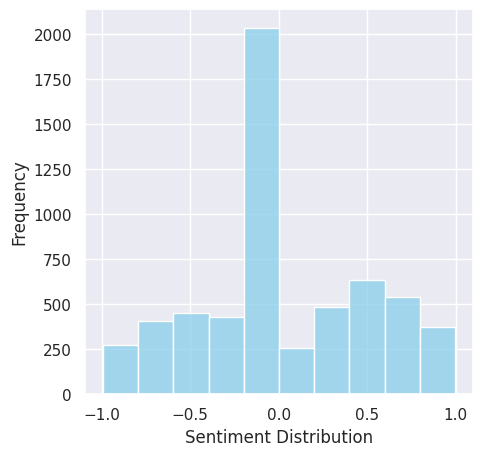

In [175]:
# 1. import necessary modules (in case not already imported)
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Settings for seaborn plotting style
sns.set(color_codes=True)

# 3. Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# 4. Create Histogram
ax = sns.histplot(tweets['C_Score'],
                  bins=10,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Sentiment Distribution', ylabel='Frequency')

**Let's simplify our analysis** *by creating a new variable called* ***Sentiment*** that assumes the strings:
- **Postive** if the compound sentiment score (C_Score) is greater than 0.05
- **Negative** if the compound sentiment score (C_Score) is less than - 0.05
- **Neutral** if the compound sentiment score (C_Score) is between -0.05 and 0.05 (including both values)

In [176]:
# 1. Create new column with missing values
tweets['Sentiment'] = np.nan

# 2. Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in tweets.iterrows(): 
    if tweets.loc[index, 'C_Score'] > 0.05 : 
            tweets.loc[index, 'Sentiment'] = "Positive"       
    elif tweets.loc[index, 'C_Score'] < -0.05 :
            tweets.loc[index, 'Sentiment'] = "Negative"   
    else : 
        tweets.loc[index, 'Sentiment'] = "Neutral"

# 3. Typecast as categorical variable (computationally more efficient)
tweets['Sentiment'] = tweets['Sentiment'].astype("category")

In [177]:
# 4. Check that it worked 
tweets[['stripped','C_Score', 'Sentiment']][5300:5310]

,stripped,C_Score,Sentiment
5300,Till next time Acuña We gonna throw a party at Corona Bar,0.4019,Positive
5301,Late lunch home made shrimp pasta a Cold Corona 🤤 Cooper City instagram.com/p/CYxDUmmJr-uG…,0.0000,Neutral
5302,Alhumdulillah iamzackknight recovered. I still have Covid/Corona the omicron variant. Hopefully I will recover soon too. I hate being sick. 😢 twitter.com/Noor_knight1/s…,-0.8126,Negative
5303,Corona: The woman gets sick – and then she makes the disgusting discoveryshare.newsbreak.com/cd70ot5k,-0.7717,Negative
5304,Tasha2NANA We don't have none of that Corona virus shit here Falls City is a small town only about 1000 people 🙂,-0.2247,Negative
5305,It is open source 👏decentralized opensource switchingtolinux North Corona instagram.com/p/CYwm1eFFoC-/…,0.0000,Neutral
5306,Yup…I think im switching to Linux… North Corona instagram.com/p/CYwlydRFqJD/…,0.0000,Neutral
5307,"Special breakfast treat this morning, because I’m forced to work today breakfastburrito ThingsEyeSee tacosvillacorona atwatervillage sparkysrootbeer Tacos Villa Corona instagram.com/p/CYwjw6dJn9g/…",0.3400,Positive
5308,Soon to be 1 million dead from Corona. twitter.com/dblereflection…,-0.6486,Negative
5309,CDM Home Tour Underwriting Opportunities! Head over to cdmhometour.com and purchase your underwriting package today! This is a great way to get your business excellent exposure! 🏡📖 Corona del Mar High School instagram.com/cdmpta/p/CYweq…,0.9057,Positive


### 3.3.2 Visualize the Sentiment Category Shares in a Doughnut Chart

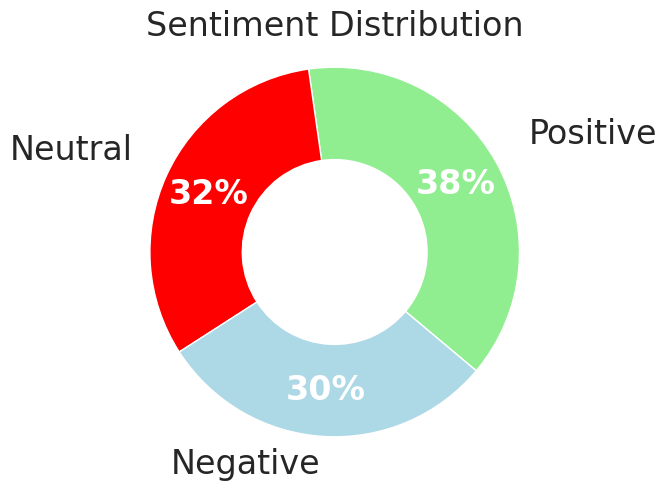

In [178]:
# 1. Import necessary modules (in case not already imported)
import matplotlib.pyplot as plt

# 2. Set font size
plt.rcParams['font.size']=24

# 3. Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# 4. Get count by sentiment category from tweets_df
sentiment_counts = tweets.Sentiment.value_counts()
labels = sentiment_counts.index

# 5. Define colors
color_palette_list = ['lightgreen', 'red', 'lightblue','orange']

# 6. Generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# 7. Plot wedges
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# 8. Set title
ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

# 9. Show Doughnut Chart
plt.show()

### 3.3.3 Sentiment Distribution over Time

Did the sentiment towards corona change over the course of a week?

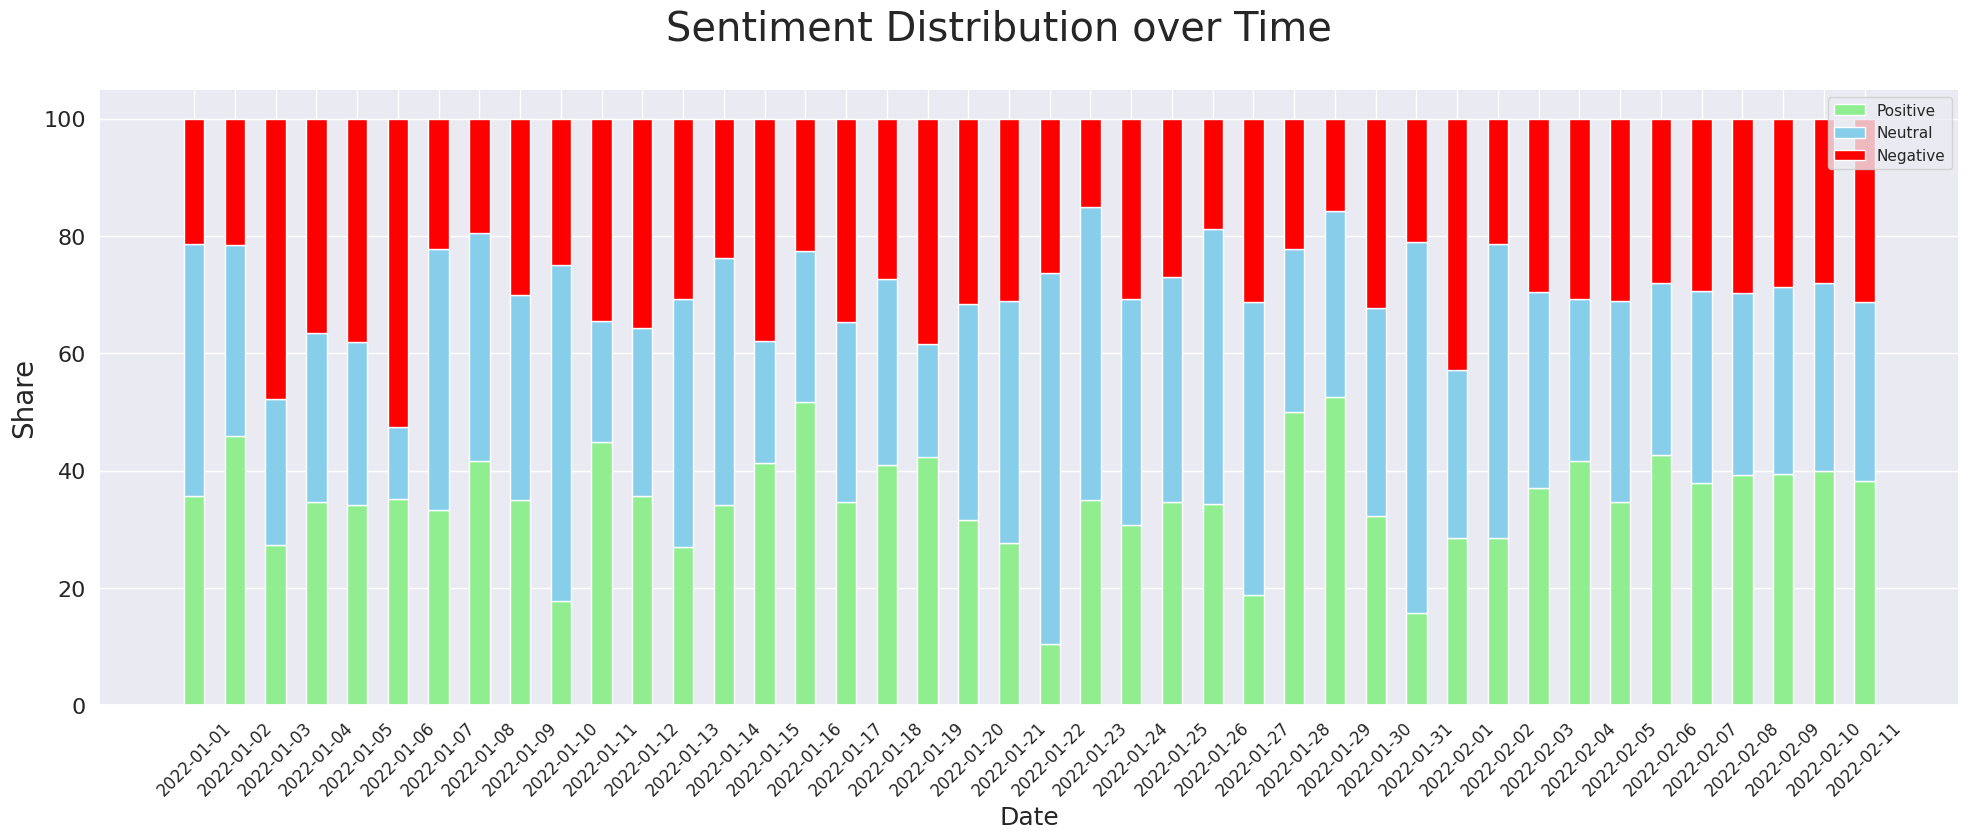

In [179]:
# 1. Import required package
import math

# 2. New column that holds days (sorted)
tweets['day'] = [one.date() for one in tweets['date']]
tweets = tweets.sort_values(by=['day'])

# 3. Create props (stacked bars) for sentiment grouped by day (as % shares)
sentiments = ["Positive", "Neutral", "Negative"]
positiveProps = (tweets[tweets.Sentiment == 'Positive'].groupby(['day']).count()[['Sentiment']]/ tweets.groupby(['day']).count()[['Sentiment']])*100
neutralProps = (tweets[tweets.Sentiment == 'Neutral'].groupby(['day']).count()[['Sentiment']]/ tweets.groupby(['day']).count()[['Sentiment']])*100
negativeProps = (tweets[tweets.Sentiment == 'Negative'].groupby(['day']).count()[['Sentiment']]/ tweets.groupby(['day']).count()[['Sentiment']])*100

# 4.Turn props into lists 
positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()

# 5. Set-up plot
plt.figure(figsize=[24, 8])
barWidth = 0.5
labels = tweets.day.unique()
r = np.arange(len(labels))

# 6. Set values to zero if missing
positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

# 7. Define appearance of bar plot
plt.bar(r,positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='red', edgecolor='white', width=barWidth)

# 8. Additional plot settings and style 
plt.xticks(r, labels, rotation = 45, fontsize=12)
plt.yticks(fontsize=16)
plt.suptitle('Sentiment Distribution over Time')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Share", fontsize=20)
plt.legend(sentiments)
plt.show()

# 9. Sort by Index again to restore orignal order of tweets (since we had grouped and sorted them differently for this part)
tweets.sort_index(inplace=True)

# 4 Naïve Topic Discovery

For marketers, it is important to understand what the topics are that consumers talk about. However, discovering topics from thousands of tweets is not a trivial task!

- Human Approach: Have people read tweets and determine what the main topics are
- Automated Approach: Use Data Science to discover topics
    - Search for tweets that contain certain text / words / strings: **Topic Tagging**
    - Visualize Word Frequencies: **World Clouds**
    - Use **Deep Learning** (coming attractions - stay tuned to this course!)

## 4.1 Topic Tagging

1. Define a list of words that are commonly associated with a topic of interest
2. Seach for those words in all tweets 
3. Identify those tweets that contain one or more of the "topic words" 

In [180]:
# 1. Import required modules (in case not already imported)
import numpy as np
import re

# 2. Let's try to identify tweets that are about beer
#    You need think for words that would be indicative of beer, that is, that make it likely that the tweet is about corona the beer.
tweets['Beer'] = tweets.stripped.str.contains('(?:^|\W*)(?:beer|beers|drink|party|beach|lime|"corona extra")(?:$|\W*)', 
    flags = re.IGNORECASE).astype(int)

# 3. Let's try to identify tweets that are about the virus
#    You need think for words that would be indicative of the corona virus, that is, that make it likely that the tweet is about corona the virus.
tweets['Virus'] = tweets.stripped.str.contains('(?:^|\W*)(?:virus|"covid-19"|death|pandemic|mask|hoax|vaccine)(?:$|\W*)',                                                                                    
    flags = re.IGNORECASE).astype(int)
 
# 4. How many tweets of each topic?
print(f"Total {tweets['Beer'].count()}")
print(f"Beer {tweets['Beer'].sum()}")
print(f"Virus {tweets['Virus'].sum()}")

Total 5877
Beer 386
Virus 1605


In [181]:
# 5. Make Pandas Columns wider so we can see all the tweet texts easily
pd.set_option('display.max_colwidth', None)

# 6. Show tweets with their repsective topic labels
tweets[['stripped','Beer','Virus']].head(10) 

,stripped,Beer,Virus
0,MartySmithESPN Margarita on the rocks no salt . Hint of Corona beer to fight Carona virus .Couple of vitamin c tablets . Pandemic cocktail baby !,1,1
1,"cramkered1 news_wafaa CITE89151110 osler_sir kbmann64 kaddystruth andre4age No, unfortunately, it was not this one. The one CITE89151110 inquired about was focusing mainly on the corona virus fiasco. In the beginning of the video, the speaker was seen fixing his shoes!",0,1
2,Just spent an entire week at work going back and forth over email over stuff that would have taken like 5 min to talk about in person. And then to find out that my kids aren’t going to be able to get corona vaccines for another several months. Feeling very defeated.,0,1
3,"👇 ""of course: corona is dumb. But we are dumber."" twitter.com/wenig_worte/st…",0,0
4,Pendley17 Plywood and corona are the perfect match,0,0
5,AlisonBlunt Scientific response to the Corona Committee odysee.com/DeansDanes:1/…,0,0
6,KamVTV This is a couple years old (closer to the start of Corona),0,0
7,"HMSA vs. Crossroads Christian Boys BasketballThe Aviators - BasketballLIVE STAM : bit.ly/3Lqv7kjThe Crossroads Christian (Corona, CA) varsity basketball team has a home non-conference game vs. Hawthorne Math Science Academy (Hawthorne, CA) today 6p.",0,0
8,"On this date (cont'd):2017- 22 days after Trump takes office, N Korea fires ballistic missile 350 mi into Sea of Japan2020- Virus outbreak officially named COVID-19: CO for corona, VI for virus, D for disease, 19 for 2019, when the outbreak was 1st reported",0,1
9,Sarah_Katilyn I switch Memorial Day weekend. Then it’s Corona until October when I switch back to Yuengling.,0,0


In [182]:
# 7. Show the tweets that are about beer / virus
select_tweets = tweets.loc[tweets['Beer'] == 1, 'stripped'].values[:]
for w in select_tweets[0:10]:
    print(w)
    print('\n')

MartySmithESPN Margarita on the rocks no salt . Hint of Corona beer to fight Carona virus .Couple of vitamin c tablets . Pandemic cocktail baby !


Meetings with developers today to go over all residential infill locations in Newport Beach and Corona del Mar up to $6M on a very hot day along the Coast! lnkd.in/gpYcF_eZ


NEWS FLASH! Our Corona Beer Apology sketch was just selected by HoustonComedyFF for the category of Animated Comedy Micro Film.🌻sketch comedy funny cartoon video podcastyoutu.be/_Cv9bPDxjqY


Life would be so much better if I was on a beach in Cabo right now with a Corona in my hand


Perfect day for a cold corona on the beach 😮‍💨


JohnCornyn YOU should never tweet about beer, John"Cornyn tweet to drink a Corona and not panic falls flat" amp.statesman.com/amp/1517961007


In the past 3 1/2 months I’ve drank 1 full corona, 1/2 of a corona miche while in Austin, and 1/2 of a Miller lite while eating crawfish. I’m so proud of me and my journey of not drinking… and choosi

## 4.2 Word Clouds from Tweets

for more details see: https://www.datacamp.com/community/tutorials/wordcloud-python

In [183]:
# Install WordCloud on your local comouter (already installed on CoLab)

Contributing Tweets 63



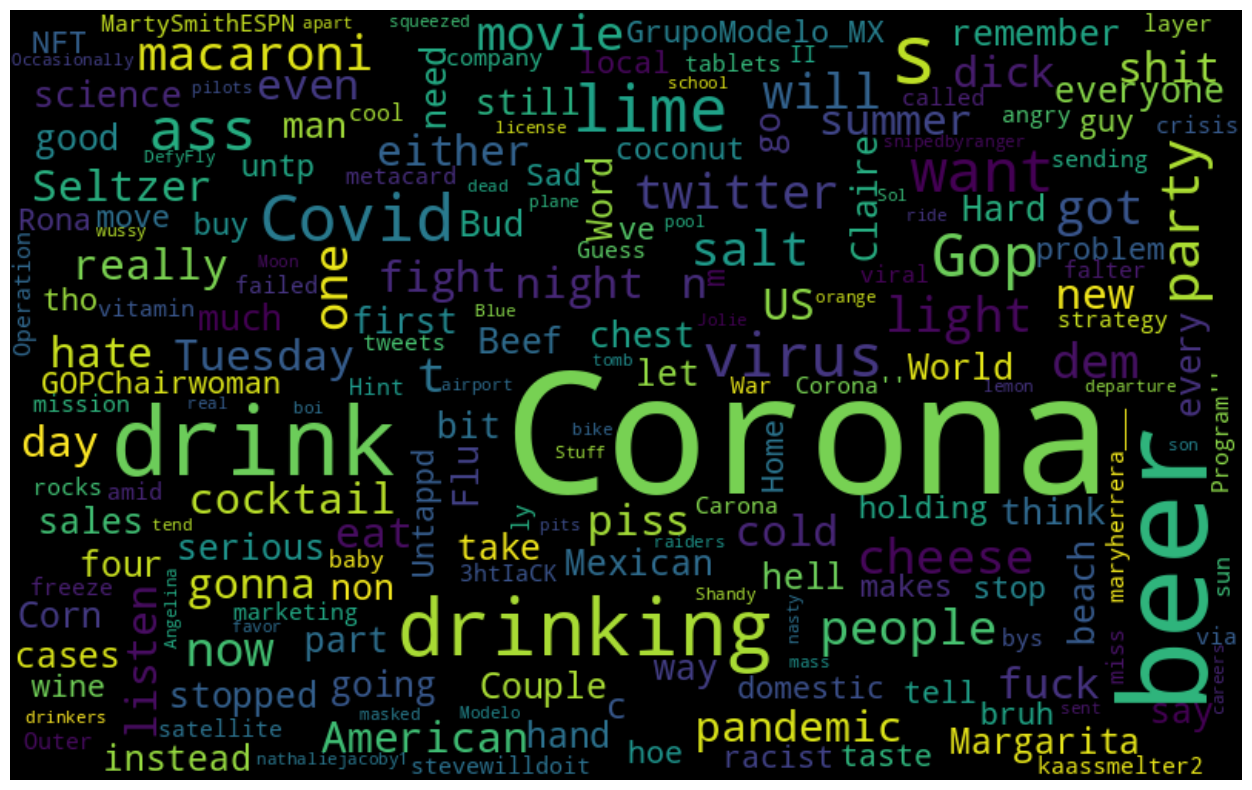

In [184]:
# 1. Import module 
from wordcloud import WordCloud

# 2. Define what we are looking for:
#sent = 'Positive'
#sent = 'Neutral'
sent = 'Negative'

clmn = 'Beer'
#clmn = 'Virus'

# 3. How many Tweets will contribute to Cloud?
print(f"Contributing Tweets {tweets[tweets['Sentiment'] == sent][clmn].sum()}\n")


# 4. Create bag of words for tweets of certain sentiment
all_words = ' '.join([text for text in tweets[(tweets['Sentiment'] == sent) & (tweets[clmn] == 1)]['stripped']])

# 5. Generate Word Cloud
wordcloud = WordCloud(collocations=True, width=800, height=500, random_state=5, max_font_size=110).generate(all_words)

# 6. Visulaize Cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Looking Ahead:**  

####**Next Class:** Tuesday, April 11, 2023  

#### **Text Analysis III:** Representation Learning

#### **Read before class:** Rust RT, Rand W, Huang M-H, Stephen AT, Brooks G, Chabuk T., 2021. Real-Time Brand Reputation Tracking Using Social Media. Journal of Marketing. 85(4):21-43. 


# **BONUS Material**

This might come in handy for your team assignment

In [185]:
# go back to temporary file storage where scraped tweets are
%cd /content/
!ls

/content
colgate.json  gdrive  sample_data  valentine2023.json


In [186]:
# Let's load some tweets first
import pandas as pd

# 1. Load a file into DataFrame
tweets = pd.read_json("valentine2023.json", lines=True)

# 2. Keep only certain columns
tweets = tweets.filter(['id','renderedContent','date'], axis=1)
tweets.rename(columns={'renderedContent':'Tweet'}, inplace=True)
tweets.head()

,id,Tweet,date
0,1625646066665402369,"@A_username_2 Wuh\nNo, you’re MY valentine",2023-02-14 23:59:59+00:00
1,1625646066661031936,Please enjoy my favorite Pride and Prejudice valentines. https://t.co/yyVJ1F2wT9,2023-02-14 23:59:59+00:00
2,1625646066078195712,Happy Valentine's. dears! Business accuracy business promotes our positive&amp;creative! To everyone's win-win...,2023-02-14 23:59:59+00:00
3,1625646065851502594,@SmileZ4DaCannoN Aww if I didn’t already have a Valentine I’d be yours 😆,2023-02-14 23:59:59+00:00
4,1625646065574871043,@magnusscn happy valentines day liz 🫶🏼🫶🏼,2023-02-14 23:59:59+00:00


# **The Tweet Preprocessor**

Let's leverage the work of someone else to preprocess our tweets. Their tweet preprocessor is part of their bachelor thesis on sentiment analysis.

https://github.com/s/preprocessor

There are several options of what you want to remove (i.e., clean):

| Option   Name  | Option Short Code |
|----------------|-------------------|
| URL            | p.OPT.URL         |
| Mention        | p.OPT.MENTION     |
| Hashtag        | p.OPT.HASHTAG     |
| Reserved Words | p.OPT.RESERVED    |
| Emoji          | p.OPT.EMOJI       |
| Smiley         | p.OPT.SMILEY      |
| Number         | p.OPT.NUMBER      |


We will use the tweet preprocessor instead of the manual approach.

In [187]:
# 1. You need to install it first:
!pip3 install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
# 2. Preprocess the tweets

# a. Import the preprocessor
import preprocessor as prepro

# b. Set options to remove URL, Reserved word
prepro.set_options(prepro.OPT.URL, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.HASHTAG)

# c. Let's do it for all tweets
tweets['text']  = tweets['Tweet'].apply(prepro.clean)

# d. Check our work
for w in tweets['text'].tail(10):
    print(w)
    print('\n')

HEY EM I HOPE YOU HAD AN AWESOME VALENTINE'S DAY!!!


Anyone wanna be our Valentine?~ 🐍 We'll be a good slave~


Happy Valentine's both of you 🥰😘🥰


Daddy says I need to be nice to my little sister on Valentine's Day, and then she does this.


Happy valentines 💝 to everyone!!


🥺 i love this so much. it’s so unfortunate that they don’t know how beautiful a wilted rose can blossom and be full again with just a lil love &amp; care 💞💞 i hope y’all have an amazing valentines!!


Got distracted from drawing p0rn by uh, writing different p0rn Upload for Valentine's MAY be a lil late...


GOP doesn't like Valentine's Day, cuz it's about love. They're all about hate.


Valentine’s Day will always be a sad day for me. One year ago I lost my dad. This past week my mom passed away. I miss you both so much


Thanks for roses, happy valentine's day !




- Because we scraped the tweets from the internet, the tweet preprocessor may not have dealt with special HTML entities such as the € symbol or &amp. 
- We also want to remove line breaks, tabs and the @ and #.

In [189]:
# 4. Fix some things the preprocessor missed 
htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;')) 
tweets.text = tweets.text.replace(
    {htmlents:'',       # remove html punctuation codes
     '#|@':'',          # remove hashtag # and reference @, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' '}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines
tweets.text = tweets.text.str.strip().replace({' +':' '},regex=True) # collapse extra spaces
# Check our Work
for w in tweets['text'].tail(10):
    print(w)
    print('\n')

HEY EM I HOPE YOU HAD AN AWESOME VALENTINE'S DAY!!!


Anyone wanna be our Valentine?~ 🐍 We'll be a good slave~


Happy Valentine's both of you 🥰😘🥰


Daddy says I need to be nice to my little sister on Valentine's Day, and then she does this.


Happy valentines 💝 to everyone!!


🥺 i love this so much. it’s so unfortunate that they don’t know how beautiful a wilted rose can blossom and be full again with just a lil love and care 💞💞 i hope y’all have an amazing valentines!!


Got distracted from drawing p0rn by uh, writing different p0rn Upload for Valentine's MAY be a lil late...


GOP doesn't like Valentine's Day, cuz it's about love. They're all about hate.


Valentine’s Day will always be a sad day for me. One year ago I lost my dad. This past week my mom passed away. I miss you both so much


Thanks for roses, happy valentine's day !




- Our data may include the same tweet multiple times. 
- We will remove identical tweets for our analysis as follows:

In [190]:
# 5. Remove duplicate tweets and reindex

print(tweets.shape)
tweets.drop_duplicates(subset='text', keep="first", inplace=True)
tweets.drop_duplicates(subset='id', keep="first", inplace=True)
print(tweets.shape)

(1000, 4)
(986, 4)


In [191]:
# 6. Reset the tweets.index to be consecutive.
tweets.reset_index(drop=True, inplace=True)

# **Geofencing on Twitter**

A **geofence** is a digital representation of space. It often contains either a single point and a radius from that point or a series of points that make up a polygon.

**Geography might matter to you!**  
Beware that scraping English tweets includes tweets from all over the world. If you are only interested in tweets from a certain region, you can add another control to your search query called ***geocode***. For the lower 48 U.S. States this would look something like this:
  - geocode:39.8,-95.583068847656,2500km

Your snscrape command would now be:
- snscrape --jsonl --progress --max-results 10000 --since 2022-01-1 twitter-search "Corona lang:en geocode:39.8,-95.583068847656,2500km until:2022-02-12" > coronaUSA2022.json

As you might observe, you are passing longitude, latitude, and a radius to Twitter. 

**Beware:** You might not get all tweets from the geographic region you selected because:

1. The location of a tweet is only available if the user that wrote the tweet had location services turned on
2. If not 1, then Twitter tries to get the location from the user's profile (which they are free to set to anything or leave blank)
3. If neither 1 nor 2, then you won't get the tweet even if it was written within the location you specified.
4. Twitter detects that you are scraping data (because of the repetitive and very unique query due to the exact geocoordinates) and shuts you down (i.e., returns error)

*Learn more here:* https://thoughtfaucet.com/search-twitter-by-location/examples/ 

# **Sentiment Analysis and Emotion Classification based on Large Language Models**

We will use a sentiment classifier based on a pre-trained large language model (more on the topic in class 24). 

*Hartmann, J., Heitmann, M., Schamp, C., & Netzer, O. (2021). The Power of Brand Selfies. Journal of Marketing Research, 58(6), 1159–1177. https://doi.org/10.1177/00222437211037258*


In [192]:
# 1. We need to install a library first
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
# 2. Let's import some functionality
from transformers import pipeline

# 3. Now we define the classifier - we are using a pre-trained model from the huggingface repository
classifier = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", top_k=None)

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [194]:
# 4. Let's classify the sentiment of a sentence
print(classifier("Till next time Acuña We gonna throw a party at Corona Bar"))
print(classifier("Late lunch home made shrimp pasta a Cold Corona 🤤 Cooper City instagram.com/p/CYxDUmmJr-uG"))
print(classifier("MartySmithESPN Margarita on the rocks no salt . Hint of Corona beer to fight Carona virus .Couple of vitamin c tablets . Pandemic cocktail baby !	"))
print(classifier("Soon to be 1 million dead from Corona. twitter.com/dblereflection…"))

[[{'label': 'positive', 'score': 0.9672250151634216}, {'label': 'neutral', 'score': 0.03192172944545746}, {'label': 'negative', 'score': 0.0008532250067219138}]]
[[{'label': 'neutral', 'score': 0.7159143686294556}, {'label': 'positive', 'score': 0.27820885181427}, {'label': 'negative', 'score': 0.005876762326806784}]]
[[{'label': 'neutral', 'score': 0.9942125678062439}, {'label': 'positive', 'score': 0.0053357454016804695}, {'label': 'negative', 'score': 0.000451716739917174}]]
[[{'label': 'neutral', 'score': 0.9246917963027954}, {'label': 'negative', 'score': 0.07402215152978897}, {'label': 'positive', 'score': 0.0012860465794801712}]]


In [195]:
# 5. Find the sentiment label with max score for a single sentence
out = classifier("Till next time Acuña We gonna throw a party at Corona Bar")[0]
label = max(out, key=lambda x:x['score']).get('label')
label

'positive'

### Emotion Recognition

*Jochen Hartmann, "Emotion English DistilRoBERTa-base". https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/, 2022.*

In [196]:
#!pip install transformers
#from transformers import pipeline

# 6. Load different model
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)
#classifier = pipeline("text-classification", model="j-hartmann/emotion-english-roberta-large", top_k=None). # larger model - not necessarily better

In [197]:
# 7. Apply classifier to text
classifier("Till next time Acuña We gonna throw a party at Corona Bar")
#classifier("Late lunch home made shrimp pasta a Cold Corona 🤤 Cooper City instagram.com/p/CYxDUmmJr-uG")
#classifier("MartySmithESPN Margarita on the rocks no salt . Hint of Corona beer to fight Carona virus .Couple of vitamin c tablets . Pandemic cocktail baby !	")
#classifier("Soon to be 1 million dead from Corona. twitter.com/dblereflection…")

[[{'label': 'joy', 'score': 0.6267806887626648},
  {'label': 'neutral', 'score': 0.2982945144176483},
  {'label': 'disgust', 'score': 0.01937725394964218},
  {'label': 'anger', 'score': 0.01902407966554165},
  {'label': 'surprise', 'score': 0.018928129225969315},
  {'label': 'sadness', 'score': 0.011747469194233418},
  {'label': 'fear', 'score': 0.005847940221428871}]]

In [198]:
# 8. Want to extract the score for just one emotion of interest for a single sentence?
out = classifier("Till next time Acuña We gonna throw a party at Corona Bar")[0]
label = "joy"
joyscore = next((item['score'] for item in out if item["label"] == label),None)
joyscore

0.6267806887626648